# Desenvolvimento em Machine Learning - Diagnóstico de Doença Cardíaca 

Neste arquivo, você encontrará o desenvolvimento em Machine Learning e Estatatístico da problemática abordada no projeto. 

### Importando os pacotes/bibliotecas do Python 

In [1]:
# Importando as bibliotecas necessárias para o desenvolvimento do projeto 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

## 1. Exploração dos dados e Limpeza 

In [9]:
# Carregar os dados e mostrando suas 5 primeiras observações
df = pd.read_csv('Rates_and_Trends_in_Heart_Disease_and_Stroke_Mortality_Among_US_Adults__35___by_County__Age_Group__Race_Ethnicity__and_Sex___2000-2019.csv', low_memory=False)

df.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
0,1999,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
1,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
2,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
3,2005,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001
4,2012,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001


In [11]:
# Informações do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770240 entries, 0 to 5770239
Data columns (total 21 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Year                        object 
 1   LocationAbbr                object 
 2   LocationDesc                object 
 3   GeographicLevel             object 
 4   DataSource                  object 
 5   Class                       object 
 6   Topic                       object 
 7   Data_Value                  float64
 8   Data_Value_Unit             object 
 9   Data_Value_Type             object 
 10  Data_Value_Footnote_Symbol  object 
 11  Data_Value_Footnote         object 
 12  Confidence_limit_Low        float64
 13  Confidence_limit_High       float64
 14  StratificationCategory1     object 
 15  Stratification1             object 
 16  StratificationCategory2     object 
 17  Stratification2             object 
 18  StratificationCategory3     object 
 19  Stratification3      

In [13]:
# Descartando os atributos Data_Value_Footnote_Symbol e Data_Value_Footnote por serem desnecessários a análise 
df.drop(columns=['Data_Value_Footnote_Symbol', 'Data_Value_Footnote'], inplace=True)

**Por que descartamos estes atributos?**

No desenvolvimento Machine Learning, em alguns momentos, se torna necessário retirar algum atributo para evitar redundância, tamanho, possíveis erros futuros, etc. Assim, o modelo se torna ainda mais preciso no resultado que desejamos chegar, mesmo que pareça "radical" demais.

In [21]:
# Verificando se há dados ausentes
df.isna().sum()

Year                             0
LocationAbbr                     0
LocationDesc                     0
GeographicLevel                  0
DataSource                       0
Class                            0
Topic                            0
Data_Value                 2365475
Data_Value_Unit                  0
Data_Value_Type                  0
Confidence_limit_Low       2365475
Confidence_limit_High      2365475
StratificationCategory1          0
Stratification1                  0
StratificationCategory2          0
Stratification2                  0
StratificationCategory3          0
Stratification3                  0
LocationID                       0
dtype: int64

### 1.1 Tratando Valores Ausentes

Visto o tamanho deste dataset, alguns valores ausentes tendem a aparecer. Dessa forma, é necessário um tratamento destes para evitar problemas e garantir um preparamento dos dados para a análise e modelagem. 

In [25]:
# Calculando a porcetagem dos valores ausentes
missing_perc = df.isna().mean() * 100
display(missing_perc)

Year                        0.000000
LocationAbbr                0.000000
LocationDesc                0.000000
GeographicLevel             0.000000
DataSource                  0.000000
Class                       0.000000
Topic                       0.000000
Data_Value                 40.994395
Data_Value_Unit             0.000000
Data_Value_Type             0.000000
Confidence_limit_Low       40.994395
Confidence_limit_High      40.994395
StratificationCategory1     0.000000
Stratification1             0.000000
StratificationCategory2     0.000000
Stratification2             0.000000
StratificationCategory3     0.000000
Stratification3             0.000000
LocationID                  0.000000
dtype: float64

In [27]:
# Para os atributos 'Data_Value', 'Confidence_limit_Low' e 'Confidence_limit_High' vamos imputar a mediana para Valores Ausentes

# Selecionar apenas as colunas relevantes para a imputação
imput_columns = ['Data_Value', 'Confidence_limit_Low', 'Confidence_limit_High']

# Preencher os valores ausentes com a mediana de cada coluna
for column in imput_columns:
    median_value = df[column].median()
    df.fillna({column: median_value}, inplace=True)

display(df[imput_columns].head())
display(df[imput_columns].isna().sum())

,Data_Value,Confidence_limit_Low,Confidence_limit_High
0,143.8,120.0,173.5
1,143.8,120.0,173.5
2,143.8,120.0,173.5
3,143.8,120.0,173.5
4,143.8,120.0,173.5


Data_Value               0
Confidence_limit_Low     0
Confidence_limit_High    0
dtype: int64

## 2. Preparação dos Dados para a Modelagem 

### 2.1 Normalização (ou Padronização) dos Dados 

In [34]:
# Identificar colunas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder nas colunas categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Definir a variável alvo (Data_Value > 100 indica presença de doença)
df['target'] = (df['Data_Value'] > 100).astype(int)

# Normalizar colunas numéricas
numeric_cols = ['Confidence_limit_Low', 'Confidence_limit_High']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())

   Year  LocationAbbr  LocationDesc  GeographicLevel  DataSource  Class  \
0     0             1            81                0           0      0   
1    16             1            81                0           0      0   
2    17             1            81                0           0      0   
3     7             1            81                0           0      0   
4    15             1            81                0           0      0   

   Topic  Data_Value  Data_Value_Unit  Data_Value_Type  Confidence_limit_Low  \
0      0       143.8                1                0             -0.353093   
1      0       143.8                1                0             -0.353093   
2      0       143.8                1                0             -0.353093   
3      0       143.8                1                0             -0.353093   
4      0       143.8                1                0             -0.353093   

   Confidence_limit_High  StratificationCategory1  Stratification1  

### 2.2 Separação dos Dados em Treino e Teste (X e Y) 

In [39]:
X = df.drop(columns=['Data_Value', 'target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4039168, 18) (1731072, 18) (4039168,) (1731072,)


### 2.3 Construção do Modelo 

In [44]:
rf_model = RandomForestClassifier(random_state=5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [46]:
# Pesquisando previsões 
y_pred = rf_model.predict(X_test)

## 3. Avaliação do Modelo

In [48]:
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print(f'Relatório: {classification}')

Acurácia: 0.9982351976116534
Relatório:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    442800
           1       1.00      1.00      1.00   1288272

    accuracy                           1.00   1731072
   macro avg       1.00      1.00      1.00   1731072
weighted avg       1.00      1.00      1.00   1731072



**Análise**

O resultado desta previsão, utilizando o _RandomForestClassifier_, teve a acurácia de _99.82%_: isso indica que o modelo é preciso em prever a ocorrência de doenças cardíacas. A _alta precisão, recall e f1-score_ mostram que o modelo é eficiente em identificar casos de presença e ausência de doenças cardíacas. 

### 3.1 Visualização dos Resultados: Matriz de Confusão

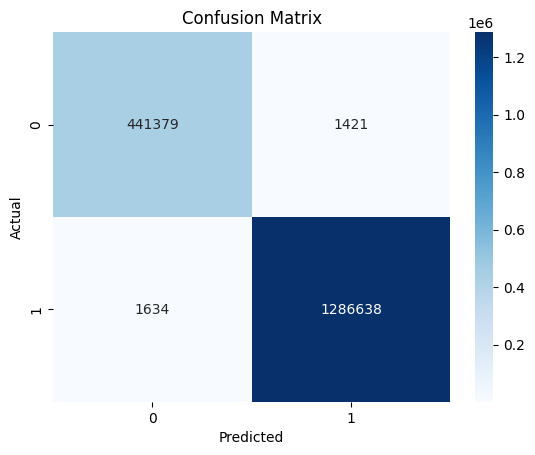

In [57]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

**Análise**

De acordo com a matriz de confusão acima, tudo indica a baixa taxa de _Falsos Positivos_ (ou seja, indica que há poucas previsões erradas não presentes) e _Falsos Negativos_ (Mesma afirmação do falso positivo. O que muda é que ela está presente). Isso indica que o modelo está equilibrado e confiável para o diagnóstico, porém, é essencial sempre estar atento com dados adicionais e garantir que generalize bem em conjuntos de dados diferentes.  

### 3.2 Visualização dos Resultados: Validação Cruzada

**Por que a Validação Cruzada?**

Para garantir que o modelo generalize bem em diferentes conjuntos de dados que possam aparecer, a _Validação Cruzada_ é essencial para garantir a qualidade do modelo nesses momentos: garantindo uma avaliação confiável, utilização eficiente dos dados, detecção de sobreajuste e hiperparâmetros otimizados. 

In [67]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

Cross-Validation Accuracy Scores: [0.98275808 0.99652008 0.98015854 0.87675383 0.4496988 ]
Mean Cross-Validation Accuracy: 0.8571778643522627


A média das pontuações da previsão é de, aproximadamente, _0.8571_, indicando que o modelo pode ter uma precisão de _85.71%_ sendo atestado em novos conjuntos de dados e divisões.

### 3.3 Importância das Variáveis 

                  Feature  Importance
9    Confidence_limit_Low    0.473628
10  Confidence_limit_High    0.413006
12        Stratification1    0.052511
14        Stratification2    0.023321
7         Data_Value_Unit    0.013033
8         Data_Value_Type    0.006634
16        Stratification3    0.006633
6                   Topic    0.003814
0                    Year    0.003239
17             LocationID    0.001742


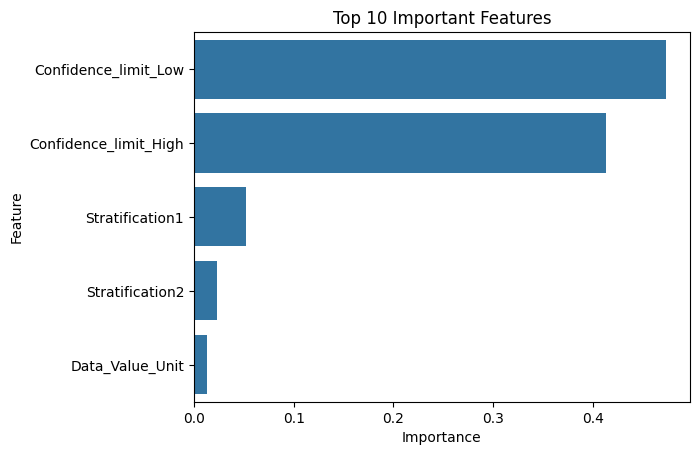

In [76]:
importances = rf_model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances.head(10))

sns.barplot(x='Importance', y='Feature', data=feature_importances.head())
plt.title('Top 10 Important Features')
plt.show();